In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

datosNY = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
#datosNY.head()

#datosNY.shape
datosNY.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [2]:
datosNY.shape

(48895, 16)

In [3]:
datosNY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
datosNY.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Viendo el total de valores nulos que hay en este conjunto de datos, se que no me seran importantes, las columnas de id, name, host_id, host_name, last_review, reviews_per_month. Aun con 10000 registros entre  last_review y reviews_per_month no me afecta en nada.

In [5]:
datosNY[datosNY['last_review'].isnull()].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


In [6]:
datosNY['name'].duplicated().sum()

np.int64(989)

In [7]:
datosNY.drop("name", axis = 1).duplicated().sum()
datosNY.drop("host_id", axis = 1).duplicated().sum()
datosNY.drop("id", axis = 1).duplicated().sum()

np.int64(0)

Asi que elimino estos campos incluyendo latitud y longitud, no me sirven para calcular cosas.

In [8]:
datosNY.drop(["reviews_per_month", "name","last_review","id","host_name","host_id","latitude","longitude"], axis = 1, inplace = True)
datosNY.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [9]:
datosNY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   room_type                       48895 non-null  object
 3   price                           48895 non-null  int64 
 4   minimum_nights                  48895 non-null  int64 
 5   number_of_reviews               48895 non-null  int64 
 6   calculated_host_listings_count  48895 non-null  int64 
 7   availability_365                48895 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.0+ MB


Ahora mismo en esta primera visualizacion de datos, mostraria asi.

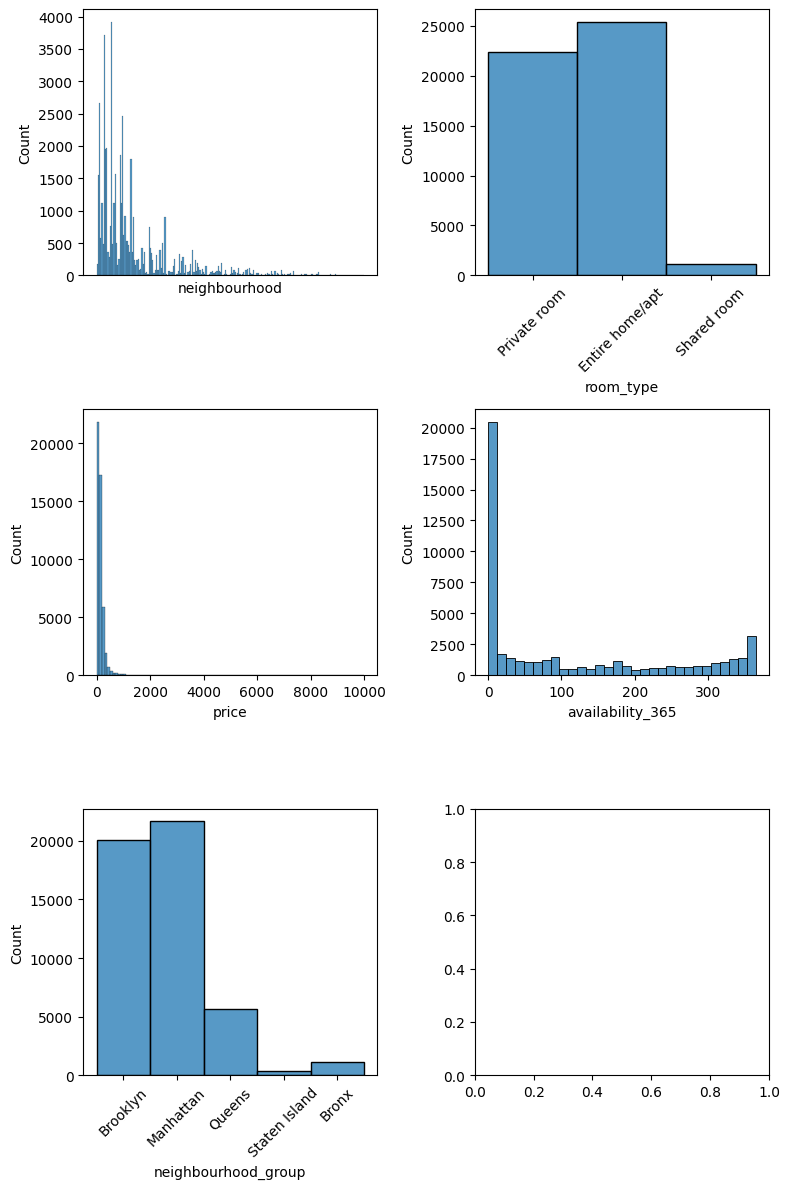

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize = (8, 12))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = datosNY, x = "neighbourhood",bins=100).set_xticks([])
sns.histplot(ax = axis[0, 1], data = datosNY, x = "room_type")
axis[0, 1].tick_params(axis='x', rotation=45)
sns.histplot(ax = axis[1, 0], data = datosNY, x = "price",bins=100)
sns.histplot(ax = axis[1, 1], data = datosNY, x = "availability_365")
sns.histplot(ax = axis[2, 0], data = datosNY, x = "neighbourhood_group")
axis[2 ,0].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Mostrar el plot
plt.show()

In [39]:
#datosNY.dropna(inplace=True)
datosNY.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
room_type_n                       0
neighbourhood_n                   0
dtype: int64

In [38]:
datosNY.shape

(48895, 11)

In [36]:
datosNY.duplicated().sum()

np.int64(1668)

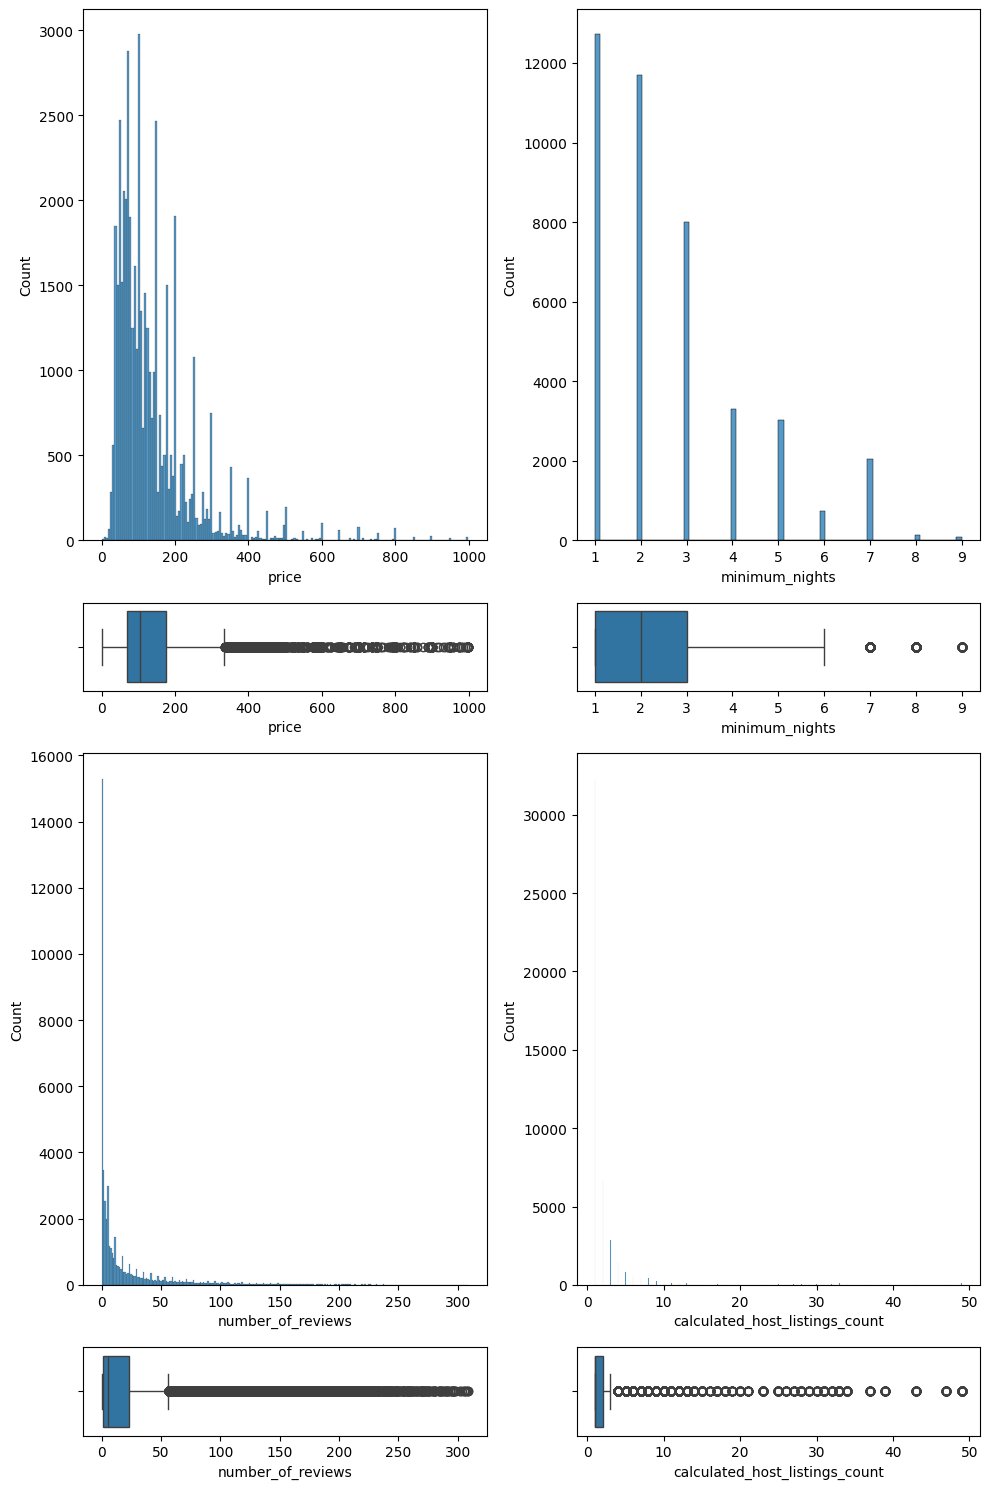

In [14]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15), gridspec_kw={'height_ratios': [6, 1,6, 1]})

datosPrecioLimit = datosNY[datosNY['price']<1000]
sns.histplot(ax = axis[0, 0], data = datosPrecioLimit, x = "price")
sns.boxplot(ax = axis[1, 0], data = datosPrecioLimit, x = "price")
datosNochesLimit = datosNY[datosNY['minimum_nights']<10]
sns.histplot(ax = axis[0, 1], data = datosNochesLimit, x = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = datosNochesLimit, x = "minimum_nights")
datosReviewsLimit = datosNY[datosNY['number_of_reviews']<310]
sns.histplot(ax = axis[2, 0], data = datosReviewsLimit, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = datosReviewsLimit, x = "number_of_reviews")
datosListadoLimit = datosNY[datosNY['calculated_host_listings_count']<50]
sns.histplot(ax = axis[2, 1], data = datosListadoLimit, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = datosListadoLimit, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

Revisando los datos, he podido ver limitando estos datos para ver una visualizacion mas clara, he despreciado solo 15% de los datos, por la parte mas larga, y aun asi creo que refleja bien este conjunto de datos. 

In [43]:
print(len(datosNY[datosNY['price']<1000]))
print(len(datosNochesLimit))
print(len(datosNY[datosNY['number_of_reviews']<310]))
print(len(datosNY[datosNY['calculated_host_listings_count']<50]))


48597
41772
48773
47523


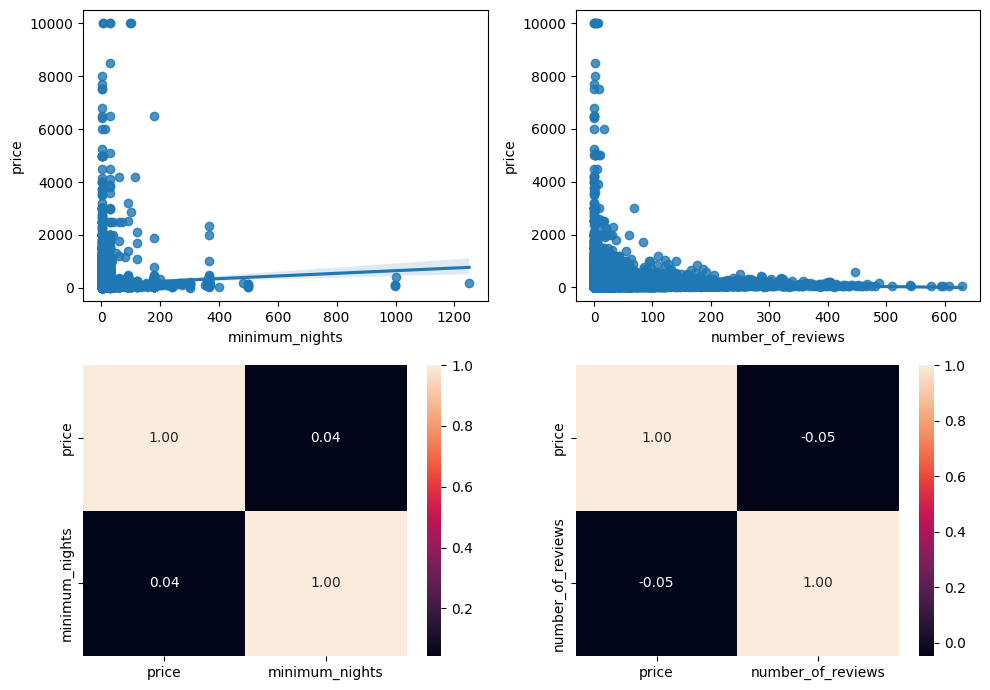

In [16]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = datosNY, x = "minimum_nights", y = "price")
sns.heatmap(datosNY[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = True)

sns.regplot(ax = axis[0,1], data = datosNY, x = "number_of_reviews", y = "price")
sns.heatmap(datosNY[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = True)

plt.tight_layout()

plt.show()

In [17]:
datosNY.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<Axes: xlabel='number_of_reviews', ylabel='price'>

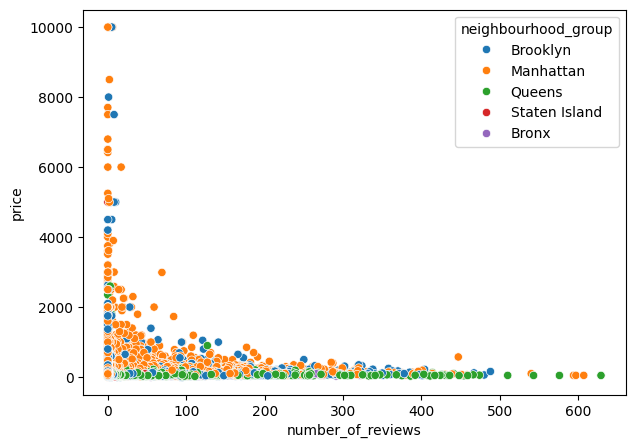

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=datosNY,x="number_of_reviews",y="price",hue="neighbourhood_group")

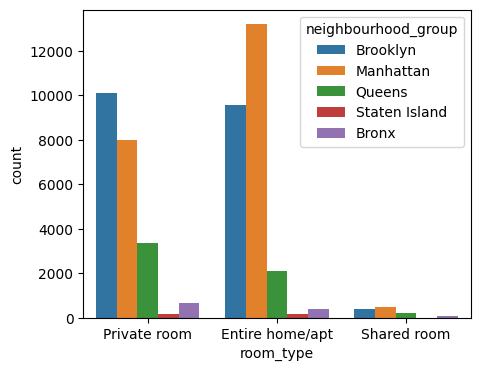

In [19]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = datosNY, x = "room_type", hue = "neighbourhood_group")

plt.show()

In [20]:
datosNY.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

num_variables = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Dividimos el conjunto de datos en muestras de train y test
X = datosNY.drop("price", axis = 1)[num_variables]
y = datosNY["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group,neighbourhood,room_type
32645,Brooklyn,Williamsburg,Entire home/apt
23615,Manhattan,Washington Heights,Private room
31183,Brooklyn,Bedford-Stuyvesant,Private room
29260,Brooklyn,Bedford-Stuyvesant,Entire home/apt
7275,Queens,Woodside,Private room


In [22]:
datosNY.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
cont_names = [ 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']
cat_names = ['neighbourhood_group', 'neighbourhood', 'room_type']
y_name = 'price'

datosNY["neighbourhood_group_n"] = pd.factorize(datosNY["neighbourhood_group"])[0]
datosNY["room_type_n"] = pd.factorize(datosNY["room_type"])[0]
datosNY["neighbourhood_n"] = pd.factorize(datosNY["neighbourhood"])[0]

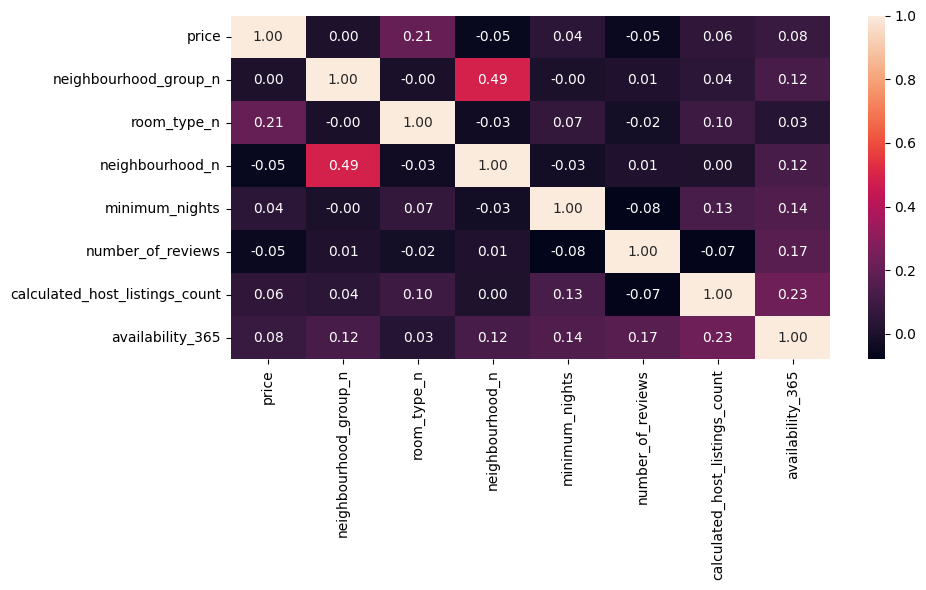

In [44]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(datosNY[['price','neighbourhood_group_n','room_type_n','neighbourhood_n',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

num_variables = ['neighbourhood_group_n','room_type_n','neighbourhood_n',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']

X = datosNY.drop("price", axis = 1)[num_variables]
y = datosNY["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group_n,room_type_n,neighbourhood_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0,1,12,3,11,1,1
23615,1,0,30,2,2,1,0
31183,0,0,6,2,0,2,0
29260,0,1,6,3,87,1,267
7275,2,0,31,5,13,1,0


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group_n,room_type_n,neighbourhood_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,-0.931915,0.798949,-0.514100,-0.193025,-0.277198,-0.186570,-0.852862
23615,0.256169,-1.050482,0.005517,-0.239596,-0.479451,-0.186570,-0.860447
31183,-0.931915,-1.050482,-0.687306,-0.239596,-0.524396,-0.156424,-0.860447
29260,-0.931915,0.798949,-0.687306,-0.193025,1.430714,-0.186570,1.164663
7275,1.444253,-1.050482,0.034385,-0.099884,-0.232253,-0.186570,-0.860447


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head(15)

,neighbourhood_group_n,room_type_n,neighbourhood_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0.00,0.5,0.054545,0.001601,0.017488,0.000000,0.002740
23615,0.25,0.0,0.136364,0.000801,0.003180,0.000000,0.000000
31183,0.00,0.0,0.027273,0.000801,0.000000,0.003067,0.000000
29260,0.00,0.5,0.027273,0.001601,0.138315,0.000000,0.731507
7275,0.50,0.0,0.140909,0.003203,0.020668,0.000000,0.000000
26011,0.25,0.5,0.031818,0.023219,0.004769,0.092025,0.739726
46572,0.25,0.5,0.127273,0.004804,0.001590,0.000000,0.117808
19902,0.25,0.5,0.050000,0.000000,0.066773,0.000000,0.010959
14159,0.00,0.0,0.090909,0.000000,0.000000,0.000000,0.000000
28528,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000


In [28]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood_group_n,room_type_n,neighbourhood_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,1,12,3,11,1,1
1,1,0,30,2,2,1,0
2,0,0,6,2,0,2,0
3,0,1,6,3,87,1,267
4,2,0,31,5,13,1,0


In [29]:
statsPrecio = datosNY["price"].describe()
statsPrecio

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [30]:
statsPrecio_iqr = statsPrecio["75%"] - statsPrecio["25%"]
upper_limit = statsPrecio["75%"] + 1.5 * statsPrecio_iqr
lower_limit = statsPrecio["25%"] - 1.5 * statsPrecio_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(statsPrecio_iqr, 2)}")

Q1 = datosNY['price'].quantile(0.25)
Q3 = datosNY['price'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
# Definir los límites inferior y superior
lower_limitQ1 = Q1 - 1.5 * IQR
upper_limitQ3 = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limitQ3, 2)} y {round(lower_limitQ1, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0
106.0
Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [31]:
# Definir los límites inferior y superior
lower_limitMas = Q1 - 3 * IQR
upper_limitMenos = Q3 + 3 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limitMenos, 2)} y {round(lower_limitMas, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 493.0 y -249.0, con un rango intercuartílico de 106.0
